In [1]:

from pandas import  *
from numpy import *
from seaborn import *
from matplotlib.pyplot import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=read_csv('income.csv')

Text(0, 0.5, 'Income ($)')

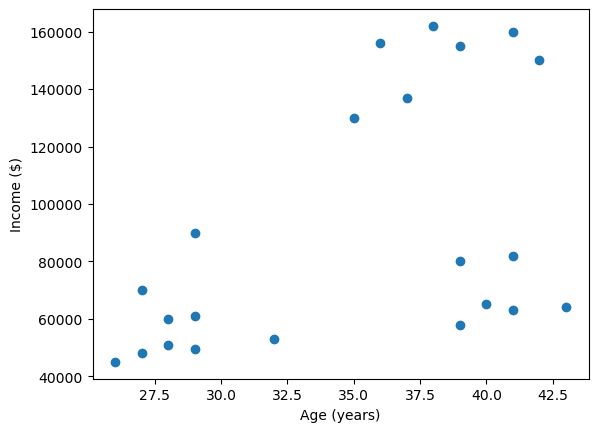

In [3]:
scatter(df['Age'],df['Income($)'])
xlabel('Age (years)')
ylabel('Income ($)')

1. we divide the data points into 3 groups
2. for this -
3. we create an object to KMeans class taking 'n_clusters' = 3.

In [4]:
from sklearn.cluster import KMeans
k=KMeans(n_clusters=3)


c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


use fit_predict method to train the model

In [ ]:

pred=k.fit_predict(df[['Age','Income($)']])    

In [5]:
pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

1. [2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0]
2. see, the 1st two data points are classified in cluster - 2
3. then the next two in cluster - 0.......
4. Basically, there are 3 clusters - 0,1,2.

Add these cluster numbers as a new col. name-'cluster' to dataframe.

In [6]:
df['cluster']=pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


find cluster centers

In [7]:
k.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

we have 3 centers i.e 6 coordinates(x,y)

In [8]:
x=k.cluster_centers_[:,0]  #all rows in 0th col.
y=k.cluster_centers_[:,1]  #all rows in 1st col.

0th col. =  x coordinates , 1st col. = y coordinates 

1. seperate 3 cluster centers into 3 dataframes depending on cluster column values.
2. cluster 0 = dataframe 1
3. cluster 1 = dataframe 2
4. cluster 2 = dataframe 3

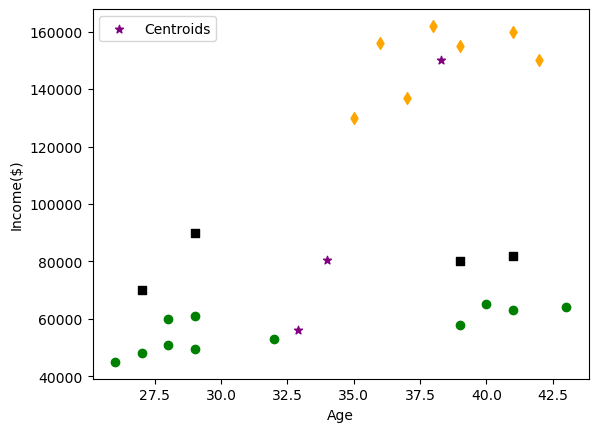

In [9]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

scatter(df1.Age,df1['Income($)'],color='green',marker='o') #use 3 diff. markers to classify data points into 3 clusters. 
scatter(df2.Age,df2['Income($)'],color='orange',marker='d')
scatter(df3.Age,df3['Income($)'],color='black',marker='s')
scatter(x,y,color='purple',marker='*',label='Centroids')
xlabel('Age')
ylabel('Income($)')
legend()

'*' = centroid / cluster centers

clusters are not perfect , we use scaling of data

In [10]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])

In [11]:
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])

In [12]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [13]:
km=KMeans(n_clusters=3)
pred=km.fit_predict(df[['Age','Income($)']])    

c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [15]:
x=km.cluster_centers_[:,0]
y=km.cluster_centers_[:,1]

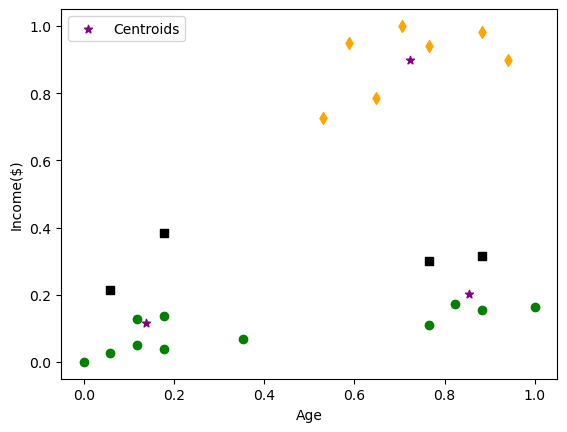

In [16]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

scatter(df1.Age,df1['Income($)'],color='green',marker='o')
scatter(df2.Age,df2['Income($)'],color='orange',marker='d')
scatter(df3.Age,df3['Income($)'],color='black',marker='s')
scatter(x,y,color='purple',marker='*',label='Centroids')
xlabel('Age')
ylabel('Income($)')
legend()

see the centers of clusters are now perfect

Now, draw the elbow point

In [17]:
s=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    s.append(km.inertia_)

c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

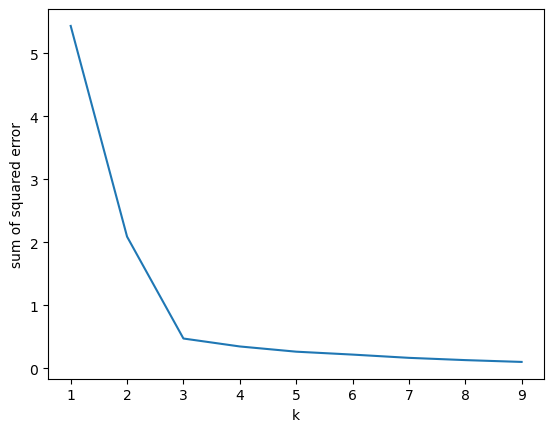

In [18]:
plot(k_rng,s)
xlabel('k')
ylabel('sum of squared error')
show()

Here, elbow point is 3 .
1. So, 3 is the optimum value for k.
2. Meaning - the data points can be divided into 3 groups(best)